In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer






In [123]:
df = pd.read_csv("dados\dados_tratados.csv")

In [124]:
df

,idade,renda_anual,tempo_emprego,risco_cliente,valor_total_emprestimo,taxa_juros,proporcao_emprestimo_renda,negativado,tempo_relacionamento_bancario,status_emprestimo,...,proposito_emprestimo_consolidacao_divida,proposito_emprestimo_educacao,proposito_emprestimo_empreendimento,proposito_emprestimo_melhoria_residencial,proposito_emprestimo_pessoal,proposito_emprestimo_saude,status_moradia_atual_aluguel,status_moradia_atual_hipoteca,status_moradia_atual_outro,status_moradia_atual_propria
0,37,35000,0.0,2,6000,11.49,0.17,0,14,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,22,56000,6.0,3,4000,13.35,0.07,0,2,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,29,28800,8.0,1,6000,8.90,0.21,0,10,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,30,70000,14.0,2,12000,11.11,0.17,0,5,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,22,60000,2.0,1,6000,6.92,0.10,0,3,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57023,34,120000,5.0,4,25000,15.95,0.21,1,10,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
57024,28,28800,0.0,3,10000,12.73,0.35,0,8,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
57025,23,44000,7.0,4,6800,16.00,0.15,0,2,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
57026,22,30000,2.0,1,5000,8.90,0.17,0,3,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [125]:
X = df.drop(columns=['status_emprestimo'], axis=1)
y = df['status_emprestimo']

In [126]:
X_teste, X_treino, y_teste, y_treino = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [127]:
df_treino = pd.concat([X_treino, y_treino], axis=1)

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

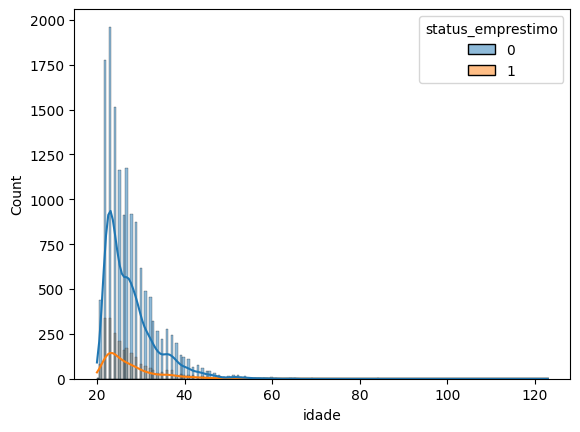

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

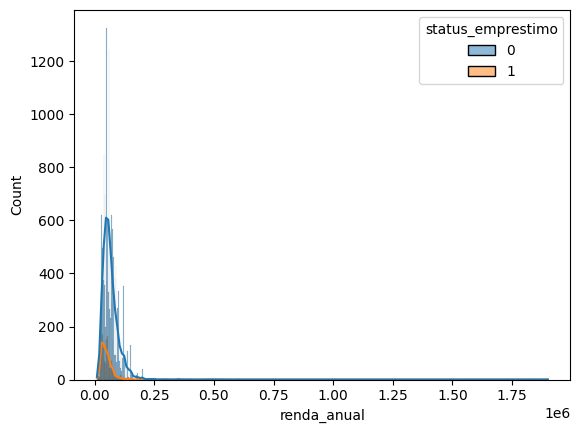

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


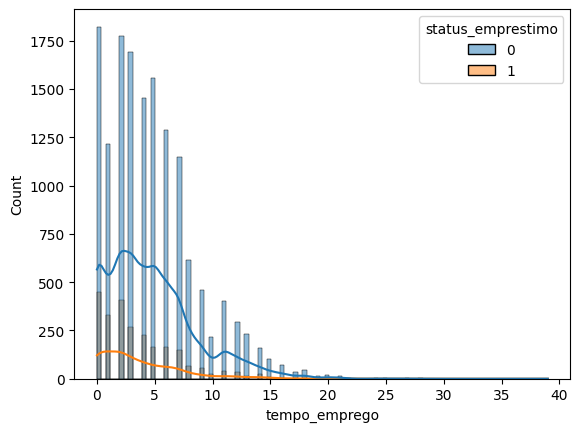

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

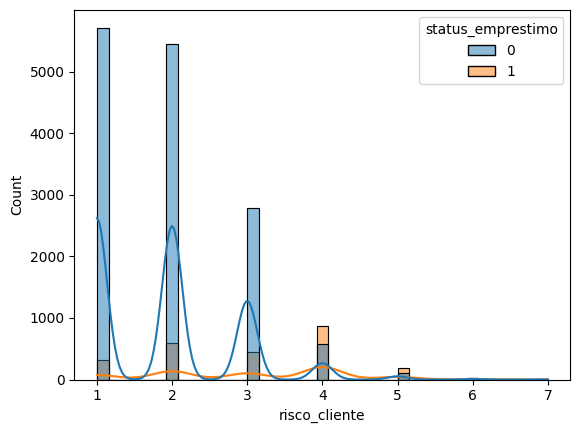

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

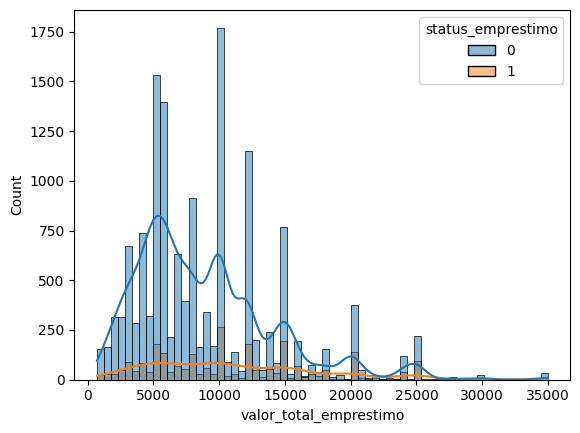

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


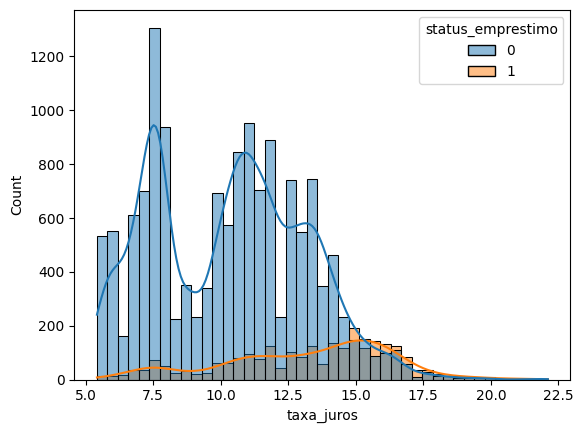

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


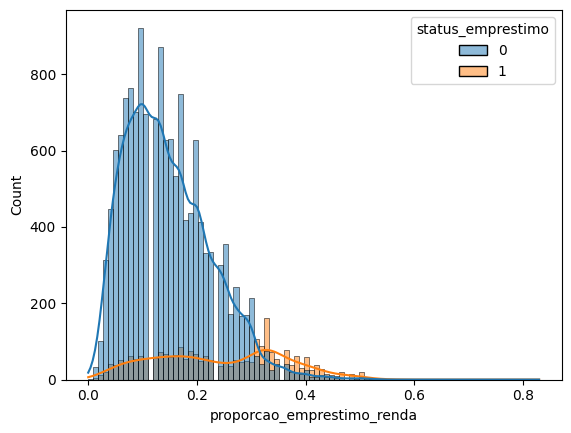

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

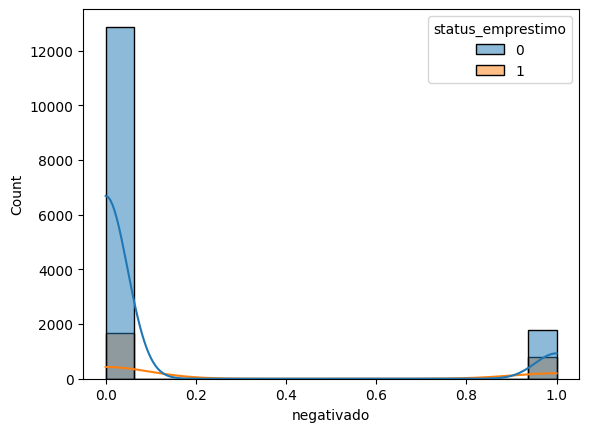

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

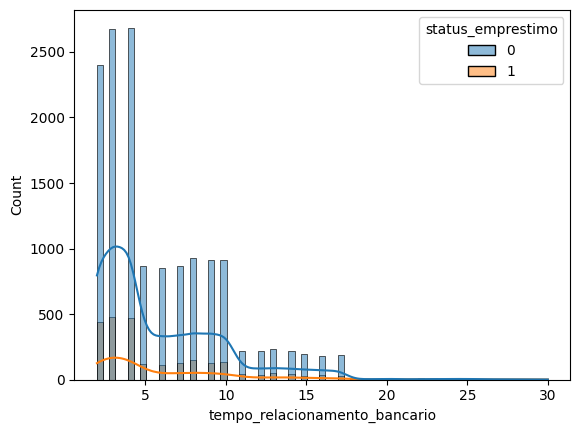

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


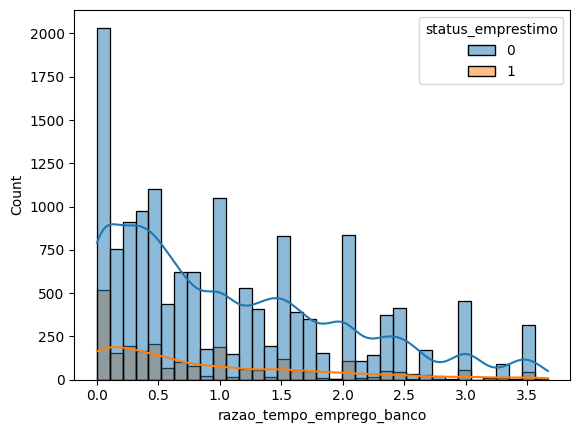

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


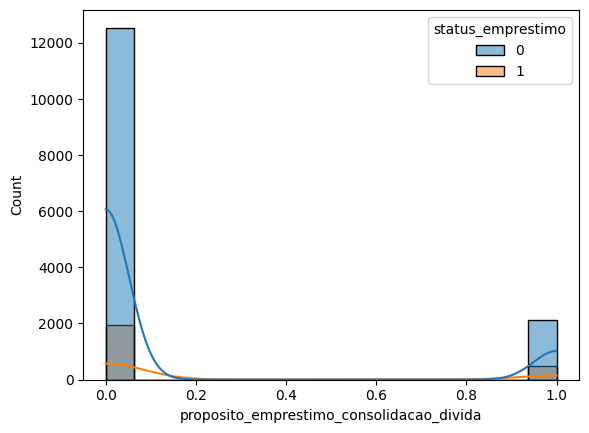

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


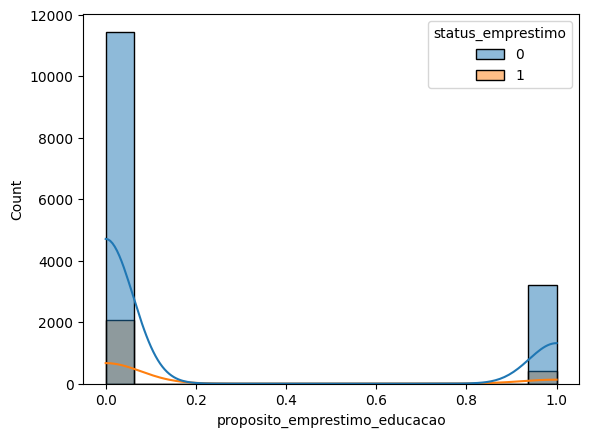

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


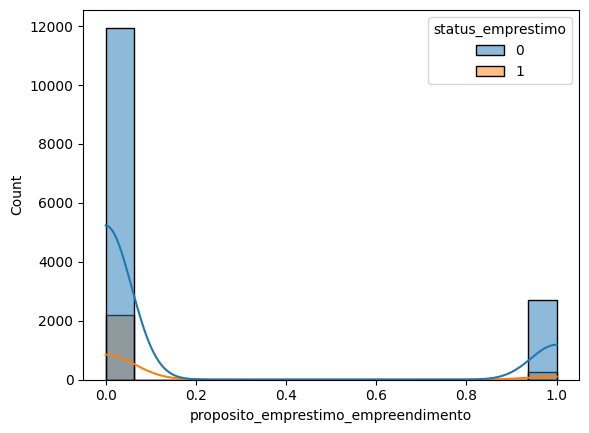

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


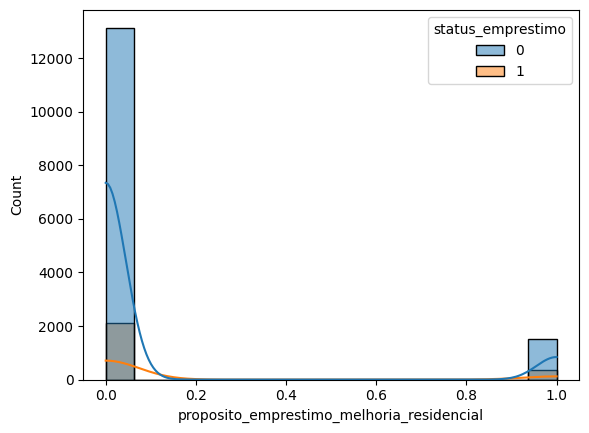

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


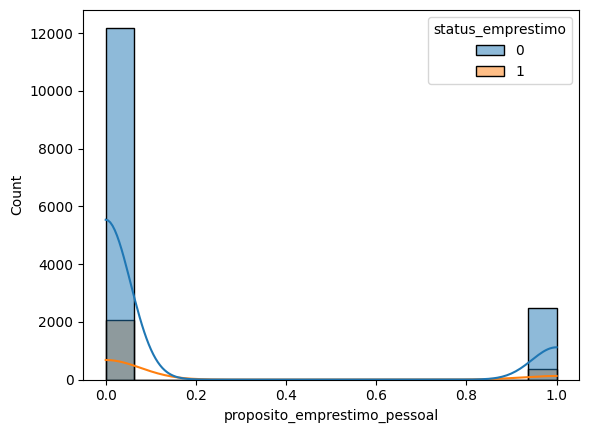

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


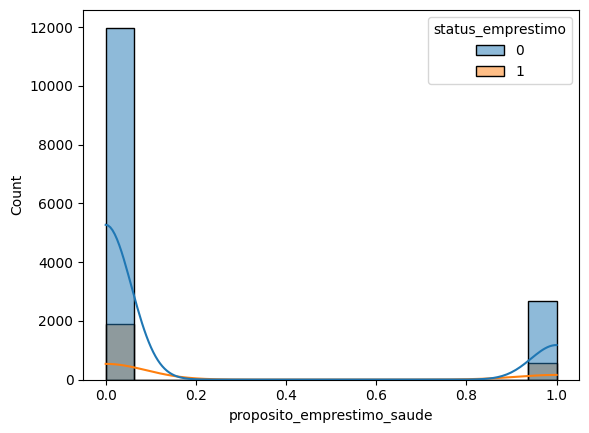

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


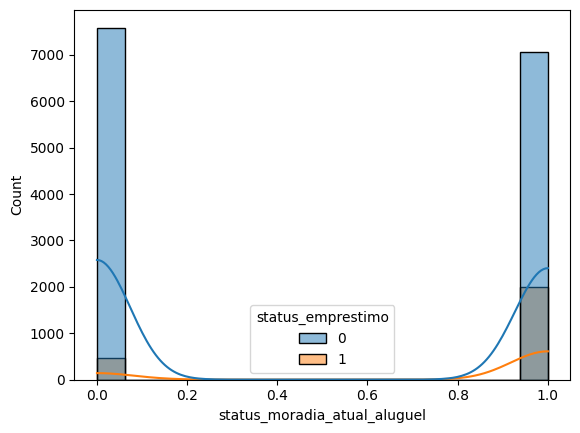

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


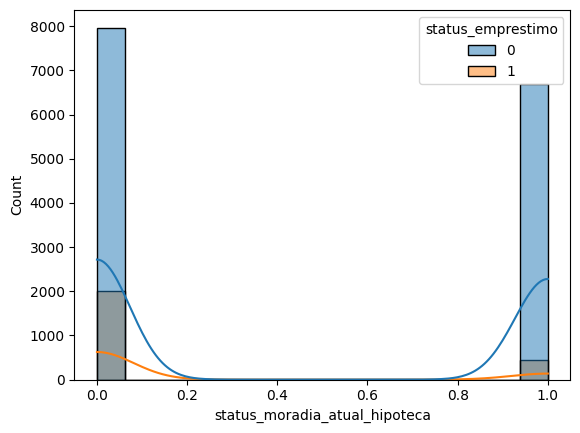

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


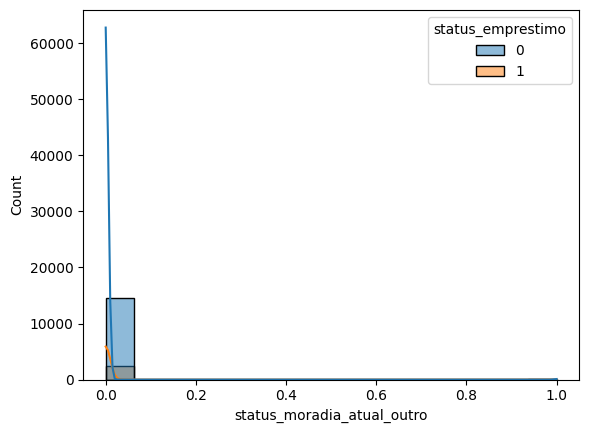

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


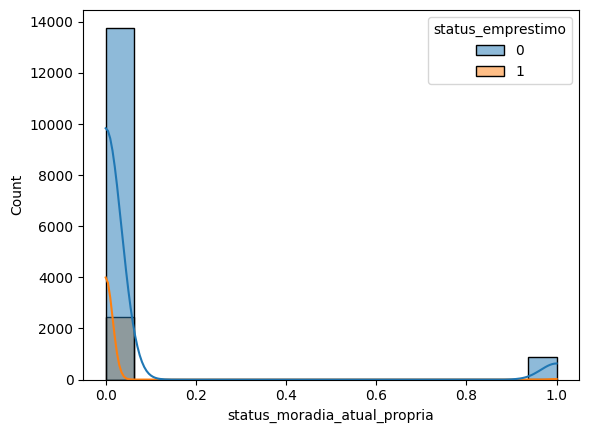

In [128]:
for col in X_treino:
    
    sns.histplot(data=X_treino, x=col, kde=True, hue=y_treino)
    plt.show()

In [129]:
pipe_pca = Pipeline([
    ('ss', StandardScaler()),
    ('pca', PCA())
])

pipe_pca.fit(X_treino)

Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA())])

In [130]:
pipe_pca['pca'].explained_variance_ratio_

array([1.43560501e-01, 1.10896342e-01, 1.02834340e-01, 7.73721124e-02,
       6.51573505e-02, 6.47181272e-02, 6.08106212e-02, 6.03795333e-02,
       5.63491360e-02, 5.43211760e-02, 5.19630791e-02, 4.98135674e-02,
       4.60569184e-02, 2.87738507e-02, 1.05855651e-02, 7.97893232e-03,
       5.37240083e-03, 3.05644731e-03, 9.38437790e-17, 1.85069557e-17])

In [131]:
exp_var = pipe_pca['pca'].explained_variance_ratio_.cumsum()*100

exp_var

array([ 14.35605005,  25.44568426,  35.72911822,  43.46632946,
        49.98206451,  56.45387723,  62.53493935,  68.57289268,
        74.20780628,  79.63992388,  84.83623179,  89.81758854,
        94.42328038,  97.30066545,  98.35922195,  99.15711519,
        99.69435527, 100.        , 100.        , 100.        ])

In [132]:
exp_var > 90

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In [133]:
X_treino_pca =pd.DataFrame(pipe_pca.transform(X_treino),
                columns=[f"PC{i+1}" for i in range(X_treino.shape[1])],
                 index=X_treino.index)
                          
X_treino_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
14619,-2.008513,1.437507,0.958552,2.763511,0.580124,0.210032,-0.134857,0.653341,0.307410,2.190073,0.799307,-0.213124,-1.251304,0.690707,-0.426535,-0.027214,0.015211,0.197581,-8.974196e-16,9.204365e-16
39801,-0.218427,-2.229086,-0.667472,1.585983,-1.801688,-0.858385,-0.211313,1.508772,0.199775,0.190249,-0.128686,0.161420,0.059082,0.574006,0.565352,-0.205203,0.304316,0.102220,1.323026e-15,2.064378e-15
10147,-2.423663,-1.022500,1.766480,-1.700384,1.692116,-0.239991,0.921336,0.716580,-0.487635,0.011004,-1.557335,0.080644,1.808191,-0.539236,0.281600,-0.933581,0.188896,-0.014403,-8.974196e-16,3.653250e-16
9305,-1.310418,-0.455882,-0.604545,1.308544,0.951974,1.983223,-1.593166,-0.557812,1.207204,-0.936014,-0.483177,-0.379370,-1.119172,0.462467,-0.293555,-0.121422,-0.001800,0.200040,-7.863973e-16,-1.300010e-15
18792,0.875462,-1.488060,-0.985624,-0.042379,1.444975,0.303525,1.126978,0.425720,-0.692952,-0.033914,-0.518534,0.025582,0.194651,-0.273327,-0.397343,0.130477,0.106575,0.112673,7.679149e-16,-8.421510e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20040,1.248910,-0.141042,-1.336547,0.604794,1.696124,0.476950,1.168819,0.479961,-0.737760,-0.352603,-0.522836,0.030483,0.127032,-0.274245,-0.146123,0.121867,0.344818,0.008329,7.679149e-16,-8.421510e-16
6440,0.339950,-0.108730,-0.918482,-0.761075,-0.545567,-1.742696,-0.818566,-1.210688,-1.918189,0.156256,0.827390,0.388418,0.191801,-0.482321,-0.578505,0.099332,-0.030424,-0.242839,3.238257e-16,1.822384e-15
51204,1.484484,-1.427647,0.298081,-0.890978,-1.232137,1.159528,-1.064289,-0.864401,-0.618776,0.221361,-1.013762,-0.120112,-0.891899,-1.286990,0.679751,-0.066106,-0.176001,-0.373672,-5.643527e-16,-2.729530e-15
54061,1.444264,2.113066,-1.802925,0.933977,-0.649386,1.662722,-0.855264,-0.727154,-0.951964,-0.563662,-0.912678,-0.074538,-1.213678,-0.447469,0.350251,-0.584369,0.678435,-0.363809,-9.241179e-18,-1.397262e-15


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


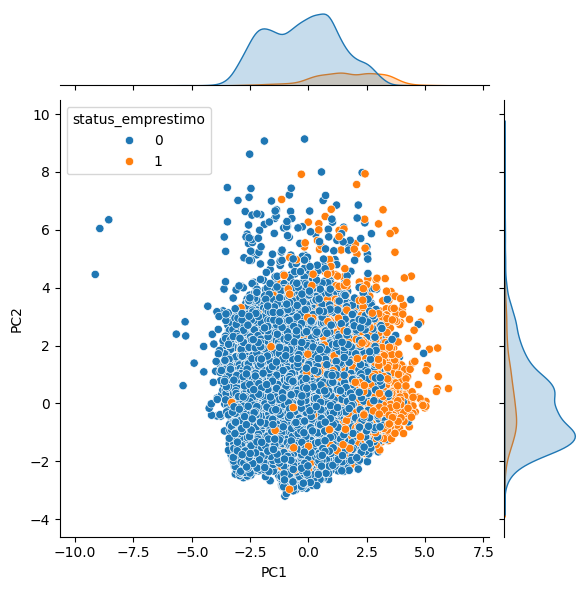

In [134]:
sns.jointplot(data=X_treino_pca, x="PC1", y="PC2", hue=y_treino)

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


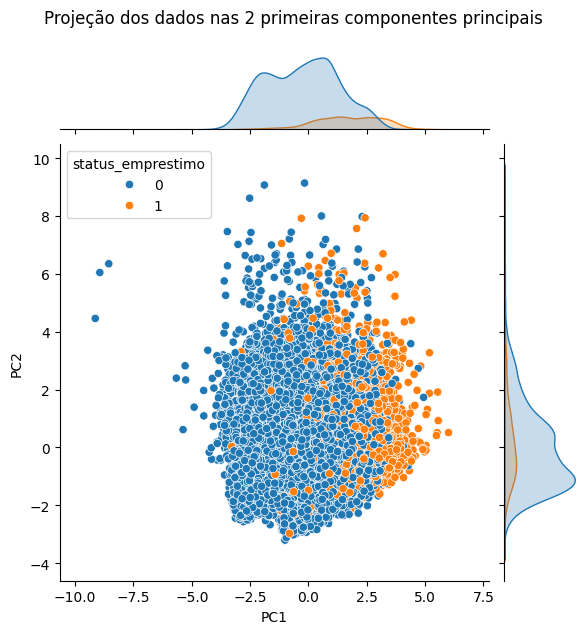

In [135]:
pipe_pca = Pipeline([("ss", StandardScaler()),
                     ("pca", PCA(n_components=2))]).fit(X_treino)

X_treino_pca = pd.DataFrame(pipe_pca.transform(X_treino), 
                           index = X_treino.index,
                           columns=[f"PC{i+1}" for i in range(pipe_pca[-1].n_components_)])

X_pca_y = pd.concat([X_treino_pca, y_treino], axis=1)

# ==========================

g = sns.jointplot(data=X_pca_y, x="PC1", y="PC2", hue="status_emprestimo")

g.fig.suptitle(f"Projeção dos dados nas 2 primeiras componentes principais", y=1.05)

plt.show()

In [136]:
class bcolors:
    OKGREEN = '\033[92m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

Para a distribuição da feature idade, temos:

t-statistic: -0.47; p-value: 6.39e-01

Falha em rejeitar H_0: parece que não há diferença na média de 'idade' em cada uma das sub-amostras 'aprovados' e 'reprovados'!!


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


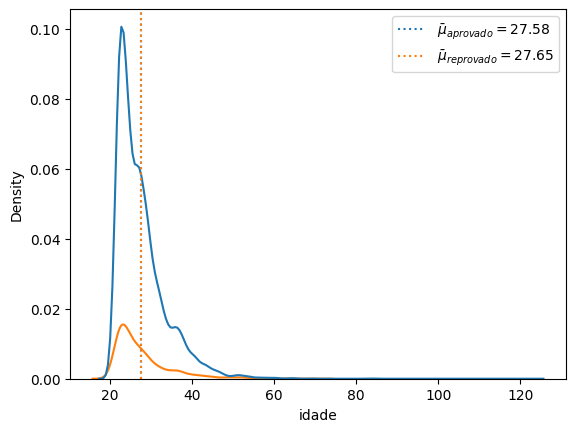



Para a distribuição da feature renda_anual, temos:

t-statistic: 32.33; p-value: 1.75e-211

Rejeição da H_0: há diferença na média de 'renda_anual' em cada uma das sub-amostras 'aprovados' e 'reprovados'!


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


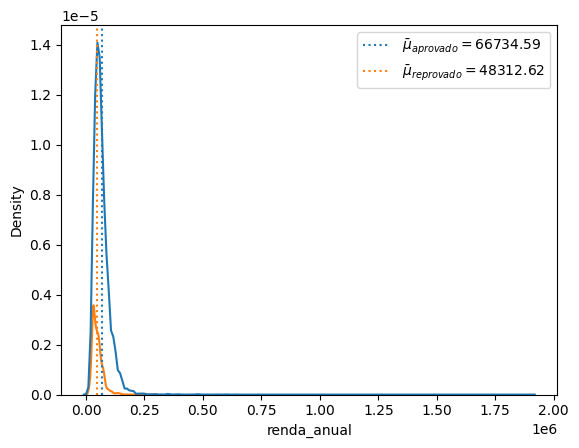



Para a distribuição da feature tempo_emprego, temos:

t-statistic: 12.77; p-value: 1.57e-36

Rejeição da H_0: há diferença na média de 'tempo_emprego' em cada uma das sub-amostras 'aprovados' e 'reprovados'!


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


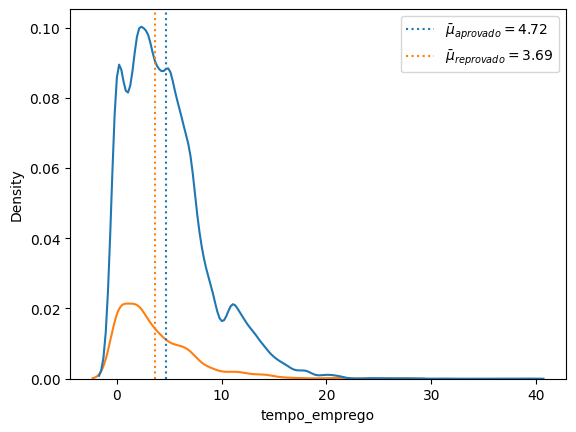



Para a distribuição da feature risco_cliente, temos:

t-statistic: -43.25; p-value: 1.01e-315

Rejeição da H_0: há diferença na média de 'risco_cliente' em cada uma das sub-amostras 'aprovados' e 'reprovados'!


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


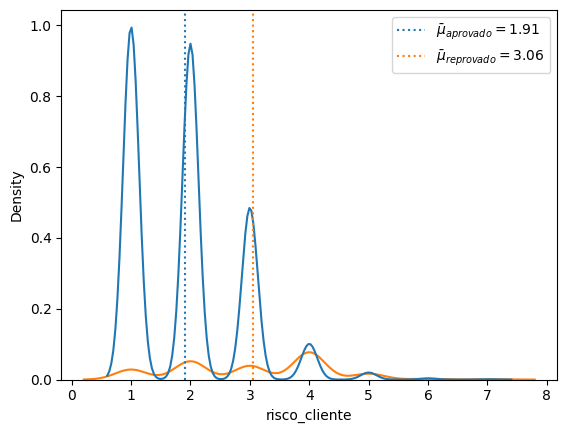



Para a distribuição da feature valor_total_emprestimo, temos:

t-statistic: -16.06; p-value: 9.02e-56

Rejeição da H_0: há diferença na média de 'valor_total_emprestimo' em cada uma das sub-amostras 'aprovados' e 'reprovados'!


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


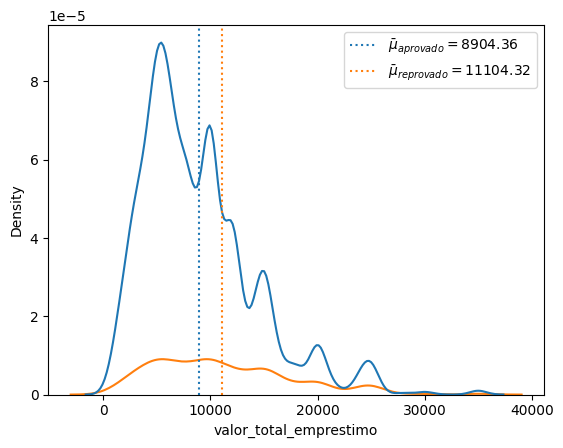



Para a distribuição da feature taxa_juros, temos:

t-statistic: -43.85; p-value: 0.00e+00

Rejeição da H_0: há diferença na média de 'taxa_juros' em cada uma das sub-amostras 'aprovados' e 'reprovados'!


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


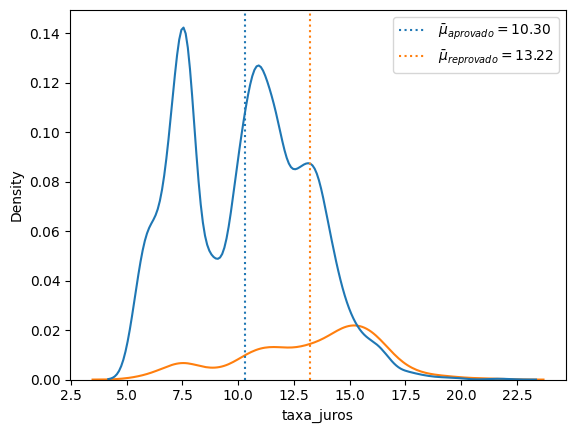



Para a distribuição da feature proporcao_emprestimo_renda, temos:

t-statistic: -38.54; p-value: 2.98e-261

Rejeição da H_0: há diferença na média de 'proporcao_emprestimo_renda' em cada uma das sub-amostras 'aprovados' e 'reprovados'!


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


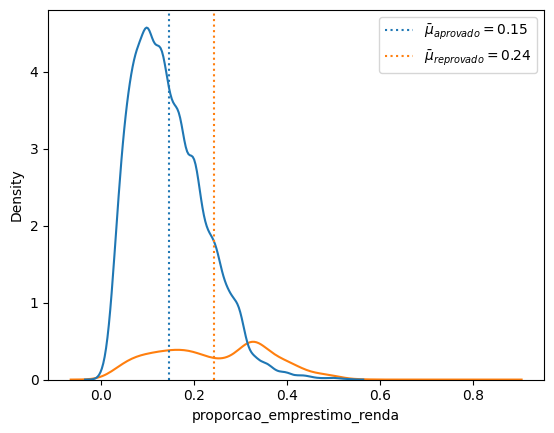



Não será possível fazer teste de hipótese na coluna negativado pois são valores binários (0 ou 1)


Para a distribuição da feature tempo_relacionamento_bancario, temos:

t-statistic: -0.09; p-value: 9.26e-01

Falha em rejeitar H_0: parece que não há diferença na média de 'tempo_relacionamento_bancario' em cada uma das sub-amostras 'aprovados' e 'reprovados'!!


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


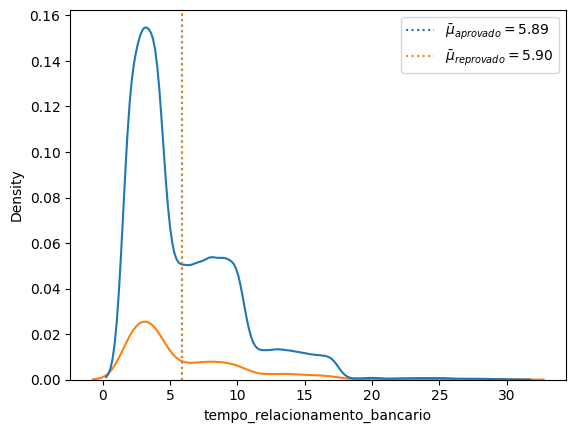



Para a distribuição da feature razao_tempo_emprego_banco, temos:

t-statistic: 9.88; p-value: 9.95e-23

Rejeição da H_0: há diferença na média de 'razao_tempo_emprego_banco' em cada uma das sub-amostras 'aprovados' e 'reprovados'!


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


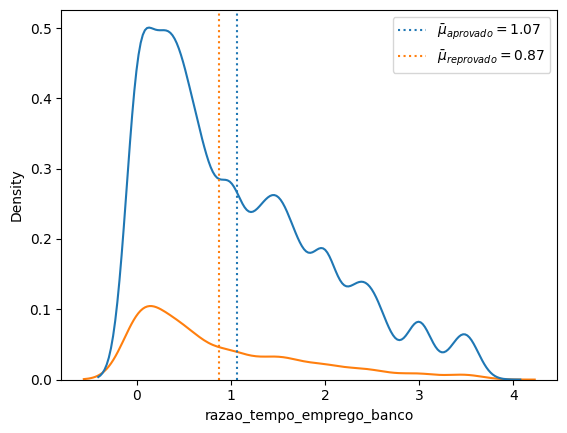



Não será possível fazer teste de hipótese na coluna proposito_emprestimo_consolidacao_divida pois são valores binários (0 ou 1)


Não será possível fazer teste de hipótese na coluna proposito_emprestimo_educacao pois são valores binários (0 ou 1)


Não será possível fazer teste de hipótese na coluna proposito_emprestimo_empreendimento pois são valores binários (0 ou 1)


Não será possível fazer teste de hipótese na coluna proposito_emprestimo_melhoria_residencial pois são valores binários (0 ou 1)


Não será possível fazer teste de hipótese na coluna proposito_emprestimo_pessoal pois são valores binários (0 ou 1)


Não será possível fazer teste de hipótese na coluna proposito_emprestimo_saude pois são valores binários (0 ou 1)


Não será possível fazer teste de hipótese na coluna status_moradia_atual_aluguel pois são valores binários (0 ou 1)


Não será possível fazer teste de hipótese na coluna status_moradia_atual_hipoteca pois são valores binários (0 ou 1)


Não será possível faze

In [137]:
# alpha de 5%
significancia = 0.05
    
# subpops de cada classe
aprovados = df_treino.query("status_emprestimo == 0")
reprovados = df_treino.query("status_emprestimo == 1")

for col in df_treino.drop(columns="status_emprestimo"):
    
    if df[col].nunique() <= 2:
        print(f"Não será possível fazer teste de hipótese na coluna {col} pois são valores binários (0 ou 1)")

    else:

        print(f"Para a distribuição da feature {col}, temos:\n")
        
        t, p_value = ttest_ind(aprovados[col].values, reprovados[col].values, alternative="two-sided", equal_var=False)
        
        print(f"t-statistic: {t:.2f}; p-value: {p_value:.2e}\n")
        
        if p_value > significancia:
            
            str_fail = f"{bcolors.FAIL}{bcolors.BOLD}"
            str_fail += "Falha em rejeitar H_0: "
            str_fail += f"parece que não há diferença na média de '{col}' em cada uma das sub-amostras 'aprovados' e 'reprovados'!!"
            str_fail += f"{bcolors.ENDC}"
            
            print(str_fail)
            
        else:
            
            str_rej = f"{bcolors.OKGREEN}{bcolors.BOLD}"
            str_rej += "Rejeição da H_0: "
            str_rej += f"há diferença na média de '{col}' em cada uma das sub-amostras 'aprovados' e 'reprovados'!"
            str_rej += f"{bcolors.ENDC}"
        
            print(str_rej)
            
        # =======================================
        
        sns.kdeplot(data=df_treino, x=col, hue="status_emprestimo")
        
        # calculando as médias amostrais de cada subpop
        mu_aprovados, mu_reprovados = aprovados[col].mean(), reprovados[col].mean()
            
        # "C0" é o azul padrão de primeira cor; "C1" é o laranja padrão de segunda cor
        plt.axvline(x=mu_aprovados, color="C0", label=r"$\bar{\mu}_{aprovado}=$"+f"{mu_aprovados:.2f}", ls=":")
        plt.axvline(x=mu_reprovados, color="C1", label=r"$\bar{\mu}_{reprovado}=$"+f"{mu_reprovados:.2f}", ls=":")

        plt.legend()
        plt.show()
        
        # =======================================
        
    print()
    print("="*80)
    print()

In [138]:
# modelo baseline, usamos os hiperparametros com valores default!
pipe_logit = Pipeline([("scaler", StandardScaler()),
                       ("logit", LogisticRegression())])

pipe_logit.fit(X_treino, y_treino)

Pipeline(steps=[('scaler', StandardScaler()), ('logit', LogisticRegression())])

In [139]:
# definindo uma função para as métricas de avaliação
def clf_metrics(modelo, X, y_true, label, plot_conf_mat=True):
    
    print(f"\nMétricas de avaliação de {label}:\n")
    
    y_pred = modelo.predict(X)

    if plot_conf_mat:
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))

        ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax[0]) 
        ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize="all", ax=ax[1])
        plt.show()

    print(classification_report(y_true, y_pred))

In [140]:
clf_metrics(pipe_logit, X_treino, y_treino, "treino", plot_conf_mat=False)
print("#"*80)
clf_metrics(pipe_logit, X_teste, y_teste, "teste", plot_conf_mat=False)


Métricas de avaliação de treino:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14655
           1       0.75      0.46      0.57      2454

    accuracy                           0.90     17109
   macro avg       0.83      0.71      0.75     17109
weighted avg       0.89      0.90      0.89     17109

################################################################################

Métricas de avaliação de teste:

              precision    recall  f1-score   support

           0       0.92      0.98      0.94     34193
           1       0.76      0.46      0.58      5726

    accuracy                           0.90     39919
   macro avg       0.84      0.72      0.76     39919
weighted avg       0.89      0.90      0.89     39919



In [141]:
# ================================
# Passo 1

pipe_dt = Pipeline([("scaler", StandardScaler()),
                    ("dt", DecisionTreeClassifier(random_state=42))])

pipe_dt.fit(X_treino, y_treino)

# ================================
# Passo 2

clf_metrics(pipe_dt, X_treino, y_treino, "treino", plot_conf_mat=False)
print("#"*80)
clf_metrics(pipe_dt, X_teste, y_teste, "teste", plot_conf_mat=False)


Métricas de avaliação de treino:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14655
           1       1.00      1.00      1.00      2454

    accuracy                           1.00     17109
   macro avg       1.00      1.00      1.00     17109
weighted avg       1.00      1.00      1.00     17109

################################################################################

Métricas de avaliação de teste:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     34193
           1       0.68      0.72      0.70      5726

    accuracy                           0.91     39919
   macro avg       0.82      0.83      0.82     39919
weighted avg       0.91      0.91      0.91     39919



In [142]:
# A mesma função de antes, mas agora com o dicionário do classificarion report retornada,
# pra gente conseguir extrair as métricas!

def clf_metrics_com_return(modelo, X, y_true, label, plot_conf_mat=True, print_cr=True):
    
    if print_cr:
        print(f"\nMétricas de avaliação de {label}:\n")
    
    y_pred = modelo.predict(X)

    if plot_conf_mat:
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))

        ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax[0]) 
        ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize="all", ax=ax[1])
        plt.show()

    if print_cr:
        print(classification_report(y_true, y_pred))
    
    return classification_report(y_true, y_pred, output_dict=True)

In [ ]:
pipe_logit = Pipeline([("scaler", StandardScaler()),
                       ("logit", LogisticRegression(random_state=42))])

pipe_rf = Pipeline([("scaler", StandardScaler()),
                    ("rf", RandomForestClassifier(random_state=42))])

pipe_dt = Pipeline([("scaler", StandardScaler()),
                    ("dt", DecisionTreeClassifier(random_state=42))])

pipe_svm = Pipeline([("scaler", StandardScaler()),
                     ("svm", SVC(random_state=42))])

# ================================================


dict_pipes = {"logit" : pipe_logit,
              "random forest" : pipe_rf,
              "decision tree" : pipe_dt,
              "svm" : pipe_svm}

# ================================================
# experimento!
# este dicionário que vai guardar os resultados do experimento

resultado_experimentos = {"estimador" : [],
                          "recall_treino" : [],
                          "recall_teste" : []}

for label, pipe in dict_pipes.items():
    
    pipe.fit(X_treino, y_treino)
    
    dict_metricas_treino = clf_metrics_com_return(pipe, X_treino, y_treino, "treino", plot_conf_mat=False, print_cr=False)

    # print(dict_metricas_treino)
    
    dict_metricas_teste = clf_metrics_com_return(pipe, X_teste, y_teste, "teste", plot_conf_mat=False, print_cr=False)
    
    f1_treino = dict_metricas_treino["1"]["recall"]
    f1_teste = dict_metricas_teste["1"]["recall"]
    
    resultado_experimentos["estimador"].append(label)
    resultado_experimentos["recall_treino"].append(f1_treino)
    resultado_experimentos["recall_teste"].append(f1_teste)
    
df_results = pd.DataFrame(resultado_experimentos)

# em casos de underfit
df_results["gap"] = (df_results["recall_treino"] - df_results["recall_teste"]).apply(lambda x: x if x > 0 else np.inf)

df_results = df_results.sort_values("recall_teste", ascending=False).sort_values("gap")

df_results

In [ ]:
# O recall da classe 1 continua baixo, pode ser um problema decorrente do fato que o dataset está desbalanceado.
# Ou os estimadores são ruins. Vou tratar primeiro o desbalanceamento e depois fazer com catboost. Minha ideia é chegar perto de 94%
# Após isso, fazer hipertunagem de parâmetros e 
# ao fim, criar um novo arquivo final para jogar para produção
# Existe um possível problema que são os outliers estão prejudicando o modelo. Eu vou limpar os dados depois.

### A partir daqui eu mandei pra um outro arquivo chamado teste1-modelagem


In [144]:
### A partir daqui eu mandei pra um outro arquivo chamado teste1-modelagem

In [ ]:
class OutlierDetector(BaseEstimator, TransformerMixin):
    def __init__(self, col_categoria, col_valor, faixa_de_tolerancia=1.5):
        self.col_categoria = col_categoria
        self.col_valor = col_valor
        self.faixa_de_tolerancia = faixa_de_tolerancia
        self.limites_outliers = {}

    def fit(self, X, y=None):
        # Calcula os limites de outliers (IQR) para cada categoria do propósito
        for categoria in X[self.col_categoria].unique():
            subset = X[X[self.col_categoria] == categoria][self.col_valor]
            Q1 = subset.quantile(0.25)
            Q3 = subset.quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - self.faixa_de_tolerancia * IQR
            limite_superior = Q3 + self.faixa_de_tolerancia * IQR
            self.limites_outliers[categoria] = (limite_inferior, limite_superior)
        return self

    def transform(self, X, y=None):
        # Cria uma coluna para marcar os outliers como 1 ou 0
        X = X.copy()
        X['outlier_valor_proposito'] = X.apply(
            lambda row: 1 if (row[self.col_valor] < self.limites_outliers[row[self.col_categoria]][0] or
                              row[self.col_valor] > self.limites_outliers[row[self.col_categoria]][1])
            else 0, axis=1
        )
        return X


In [ ]:
df.columns.tolist()

In [ ]:
# Instancia o OneHotEncoder com nomeação de colunas customizada
encoder = OneHotEncoder(sparse_output=False, drop=None)
onehot_encoded = encoder.fit_transform(df[['proposito_emprestimo']])

# Cria o DataFrame com colunas nomeadas
onehot_df = pd.DataFrame(
    onehot_encoded, 
    columns=[f"proposito_emprestimo_{category}" for category in encoder.categories_[0]]
)

# Concatena o DataFrame original com as colunas de OneHotEncoding
df = pd.concat([df, onehot_df], axis=1)

df.drop(columns='proposito_emprestimo', axis=1, inplace=True)

## Fazer o mesmo para status moradia atual

onehot_encoded = encoder.fit_transform(df[['status_moradia_atual']])

# Cria o DataFrame com colunas nomeadas
onehot_df = pd.DataFrame(
    onehot_encoded, 
    columns=[f"status_moradia_atual_{category}" for category in encoder.categories_[0]]
)

# Concatena o DataFrame original com as colunas de OneHotEncoding
df = pd.concat([df, onehot_df], axis=1)

df.drop(columns='status_moradia_atual', axis=1, inplace=True)


In [ ]:
df.columns.tolist()

['idade',
 'renda_anual',
 'tempo_emprego',
 'risco_cliente',
 'valor_total_emprestimo',
 'taxa_juros',
 'proporcao_emprestimo_renda',
 'negativado',
 'tempo_relacionamento_bancario',
 'status_emprestimo',
 'razao_tempo_emprego_banco',
 'proposito_emprestimo_consolidacao_divida',
 'proposito_emprestimo_educacao',
 'proposito_emprestimo_empreendimento',
 'proposito_emprestimo_melhoria_residencial',
 'proposito_emprestimo_pessoal',
 'proposito_emprestimo_saude',
 'status_moradia_atual_aluguel',
 'status_moradia_atual_hipoteca',
 'status_moradia_atual_outro',
 'status_moradia_atual_propria']

In [ ]:
# Vou fazer alguns testes aqui. Tanto implementar balanceamento dentro dos hiperparâmetros dos estimadores, como SMOTE



# Regressão logística
pipe_logit_cru = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                        ("scaler", StandardScaler()),
                       ("logit", LogisticRegression(random_state=42))])

pipe_logit_balanceado = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                                  ("scaler", StandardScaler()),
                       ("logit", LogisticRegression(random_state=42, class_weight='balanced'))])

pipe_logit_smote = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                             ("scaler", StandardScaler()),
                             ("smote", SMOTE(random_state=42)),
                       ("logit", LogisticRegression(random_state=42))])


# Random Forest
pipe_rf_cru = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                        ("scaler", StandardScaler()),
                    ("rf", RandomForestClassifier(random_state=42))])

pipe_rf_balanceado = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                               ("scaler", StandardScaler()),
                    ("rf", RandomForestClassifier(random_state=42, class_weight='balanced'))])

pipe_rf_smote = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                          ("scaler", StandardScaler()),
                          ("smote", SMOTE(random_state=42)),
                    ("rf", RandomForestClassifier(random_state=42))])

# Decision Tree
pipe_dt_cru = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                        ("scaler", StandardScaler()),
                    ("dt", DecisionTreeClassifier(random_state=42))])

pipe_dt_balanceado = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                               ("scaler", StandardScaler()),
                    ("dt", DecisionTreeClassifier(random_state=42, class_weight='balanced'))])

pipe_dt_smote = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                              ("scaler", StandardScaler()),
                          ("smote", SMOTE(random_state=42)),
                    ("dt", DecisionTreeClassifier(random_state=42))])



# SVM

pipe_svm_cru = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                         ("scaler", StandardScaler()),
                     ("svm", SVC(random_state=42))])

pipe_svm_balanceado = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                                ("scaler", StandardScaler()),
                     ("svm", SVC(random_state=42, class_weight='balanced'))])

pipe_svm_smote = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                           ("scaler", StandardScaler()),
                           ("smote", SMOTE(random_state=42)),
                     ("svm", SVC(random_state=42))])


# Catboost 

pipe_catboost_cru = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                              ("scaler", StandardScaler()),
                              ("catboost", CatBoostClassifier(random_state=42, verbose=0))])

pipe_catboost_balanceado = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                                     ("scaler", StandardScaler()),
                                     ("catboost", CatBoostClassifier(random_state=42, auto_class_weights='Balanced', verbose=0))])

# CatBoost com SMOTE
pipe_catboost_smote = Pipeline([('outlier_detector', OutlierDetector(col_categoria='proposito_emprestimo', col_valor='valor_total_emprestimo')),
                                ("scaler", StandardScaler()),
                                   ("smote", SMOTE(random_state=42)),
                                   ("catboost", CatBoostClassifier(random_state=42, verbose=0))])

# ================================================


dict_pipes = {"logit cru" : pipe_logit_cru,
              "logit balanceado": pipe_logit_balanceado,
              "logit smote": pipe_logit_smote,
              "random forest cru" : pipe_rf_cru,
              "random forest balanceado": pipe_rf_balanceado,
              "random forest smote": pipe_rf_smote,
              "decision tree cru" : pipe_dt_cru,
              "decision tree balanceado": pipe_dt_balanceado,
              "decision tree smote": pipe_dt_smote,
              "svm cru" : pipe_svm_cru,
              "svm balanceado": pipe_svm_balanceado,
              "svm smote": pipe_svm_smote,
              "catboost_cru": pipe_catboost_cru,
              "catboost balancado": pipe_catboost_balanceado,
              "catboost smote": pipe_catboost_smote
              }

# ================================================
# experimento!
# este dicionário que vai guardar os resultados do experimento

resultado_experimentos = {"estimador" : [],
                          "recall_treino" : [],
                          "recall_teste" : []}

for label, pipe in dict_pipes.items():
    
    pipe.fit(X_treino, y_treino)
    
    dict_metricas_treino = clf_metrics_com_return(pipe, X_treino, y_treino, "treino", plot_conf_mat=False, print_cr=False)

    # print(dict_metricas_treino)
    
    dict_metricas_teste = clf_metrics_com_return(pipe, X_teste, y_teste, "teste", plot_conf_mat=False, print_cr=False)
    
    f1_treino = dict_metricas_treino["1"]["recall"]
    f1_teste = dict_metricas_teste["1"]["recall"]
    
    resultado_experimentos["estimador"].append(label)
    resultado_experimentos["recall_treino"].append(f1_treino)
    resultado_experimentos["recall_teste"].append(f1_teste)

    print(f'treinamento do modelo {label} finalizado')
    
df_results = pd.DataFrame(resultado_experimentos)

# em casos de underfit
df_results["gap"] = (df_results["recall_treino"] - df_results["recall_teste"]).apply(lambda x: x if x > 0 else np.inf)

df_results = df_results.sort_values("recall_teste", ascending=False)

df_results

KeyError: 'proposito_emprestimo'